复刻书上的10-arm实验

In [1]:
import numpy as np
import matplotlib.pyplot as plt

定义Bandit Testbed

In [3]:
class Bandit:
    def __init__(self, num_arms=10):
        # 真实的 q*(a) 从 N(0,1) 采样
        self.q_star = np.random.normal(0, 1, num_arms)
    
    def get_reward(self, action):
        # 选择某个动作后，奖励从 N(q*(a),1) 采样
        return np.random.normal(self.q_star[action], 1)
    
    def optimal_action(self):
        return np.argmax(self.q_star)


定义Agent （RL Strategy）

In [4]:
class Agent:
    def __init__(self, num_arms=10, epsilon=0.1):
        self.epsilon = epsilon
        self.q_estimates = np.zeros(num_arms)  # 初始 Q 值设为 0
        self.action_counts = np.zeros(num_arms)  # 记录每个动作的选择次数
    
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(len(self.q_estimates))  # 随机选择动作（探索）
        else:
            return np.argmax(self.q_estimates)  # 选择当前估计值最高的动作（开发）
    
    def update(self, action, reward):
        self.action_counts[action] += 1
        alpha = 1 / self.action_counts[action]  # 样本平均更新法
        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])


运行一个test，查看Q的更新情况

In [5]:
num_steps = 1000
bandit = Bandit()
agent = Agent(epsilon=0.1)

rewards = []
optimal_action_counts = []

for step in range(num_steps):
    action = agent.select_action()
    reward = bandit.get_reward(action)
    agent.update(action, reward)

    rewards.append(reward)
    optimal_action_counts.append(action == bandit.optimal_action())

print("Final Q estimates:", agent.q_estimates)
print("True q* values:", bandit.q_star)


Final Q estimates: [-0.68824683  0.1739317   0.35608575 -0.94032002  0.00501288 -0.31651792
  0.19003944 -1.60071612 -2.76938747 -1.09951859]
True q* values: [-0.7052526  -0.01037854  0.33429588 -0.86050783 -0.49031827 -0.36735806
  0.07432538 -1.41562344 -2.3538166  -0.74421896]


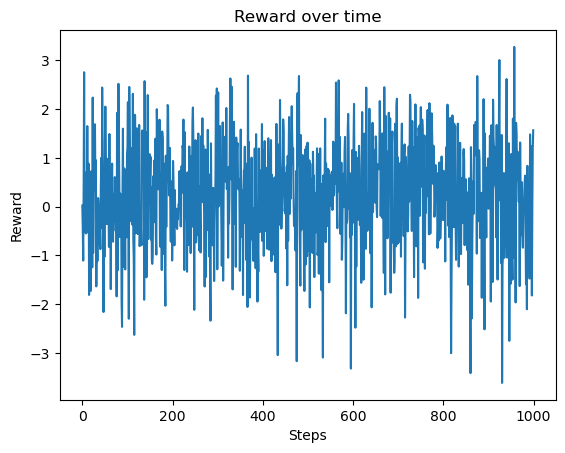

In [6]:
plt.plot(rewards)
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.title("Reward over time")
plt.show()


运行2000次实验，计算Average Reward

In [7]:
num_experiments = 2000
epsilons = [0, 0.01, 0.1]
num_arms = 10

avg_rewards = {eps: np.zeros(num_steps) for eps in epsilons}
optimal_action_pct = {eps: np.zeros(num_steps) for eps in epsilons}

for experiment in range(num_experiments):
    bandit = Bandit()
    
    for eps in epsilons:
        agent = Agent(num_arms=num_arms, epsilon=eps)
        optimal_action = bandit.optimal_action()

        for step in range(num_steps):
            action = agent.select_action()
            reward = bandit.get_reward(action)
            agent.update(action, reward)

            avg_rewards[eps][step] += reward
            optimal_action_pct[eps][step] += (action == optimal_action)

# 计算最终均值
for eps in epsilons:
    avg_rewards[eps] /= num_experiments
    optimal_action_pct[eps] = (optimal_action_pct[eps] / num_experiments) * 100

print("Finished 2000 experiments!")


Finished 2000 experiments!


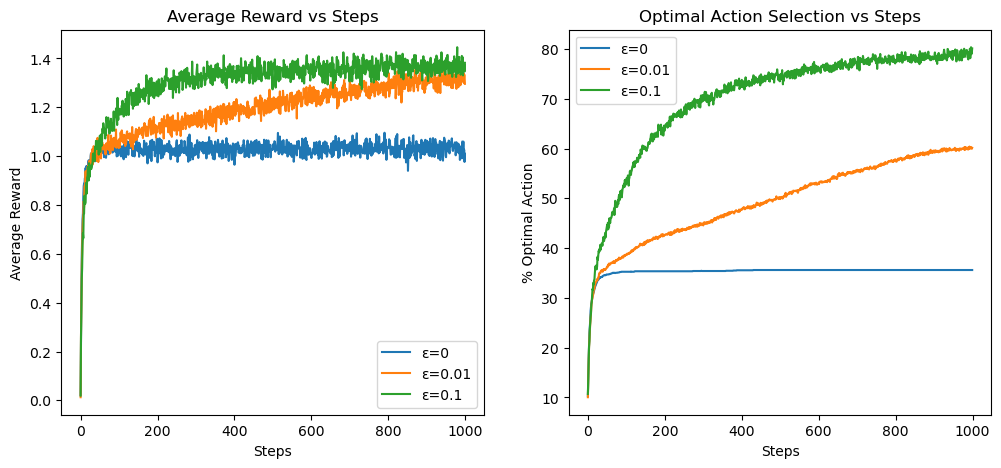

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for eps in epsilons:
    plt.plot(avg_rewards[eps], label=f'ε={eps}')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Average Reward vs Steps")

plt.subplot(1, 2, 2)
for eps in epsilons:
    plt.plot(optimal_action_pct[eps], label=f'ε={eps}')
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.legend()
plt.title("Optimal Action Selection vs Steps")

plt.show()
